# Data exploration

In [2]:
# This is just a visual thing, I don't like how Jupyter usually displays things
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [5]:
import pandas as pd

In [124]:
# Sentences that don't end with punctuation.
# In general we don't need to worry about this, since as long as the slider fits, it properly reads the last word. 
def punctuation(df):
    cnt = 0
    for sent_id in df['sentence'].unique():
        sentence = df[df['sentence'] == sent_id]
        types = list(sentence['sem'].values)
        if types[-1] != 'NIL' and types[-1] != 'QUE' and types[-1] != 'EMP':
#             print(sent_id, sentence.index[-1], sentence['word'].values[-1], types[-1], sentence['sns'].values[-1])
#             print(sentence['word'].values)
            cnt += 1
    return cnt

In [125]:
def describe_data(df):
    display(df.describe())
    print(len(df[df['sns'] != 'O']), "words that have a meaningful sense\n", 
          len(df['sns'].unique()), "unique senses\n", 
          len(df['sem'].unique()), "unique roles\n",
          punctuation(df), "sentences without punctuation at the end")

In [126]:
dat = pd.read_csv("data/csv/dev.csv", index_col=0)
describe_data(dat)

,sentence,word,sym,sem,sns
count,5423,5423,5423,5423,5423
unique,885,1562,1309,61,1207
top,p30/d0706,.,.,NIL,O
freq,32,776,776,861,2898


2525 words that have a meaningful sense
 1207 unique senses
 61 unique roles
 16 sentences without punctuation at the end


In [127]:
train = pd.read_csv("data/csv/train.csv", index_col=0)
describe_data(train)

,sentence,word,sym,sem,sns
count,43024,43024,43024,43024,43024
unique,6620,6083,4859,68,4443
top,p23/d0064,.,.,NIL,O
freq,36,5997,5997,6735,22578


20446 words that have a meaningful sense
 4443 unique senses
 68 unique roles
 82 sentences without punctuation at the end


In [128]:
test = pd.read_csv("data/csv/test.csv", index_col=0)
describe_data(test)

,sentence,word,sym,sem,sns
count,5776,5776,5776,5776,5776
unique,898,1670,1425,62,1228
top,p61/d3477,.,.,NIL,O
freq,15,800,800,887,3031


2745 words that have a meaningful sense
 1228 unique senses
 62 unique roles
 19 sentences without punctuation at the end


In [129]:
# Plot sentence lengths. Used to decide valid context window sizes
def sen_len(df, colour, plot):
    lengths = df['sentence'].value_counts().rename_axis('sentence').reset_index(name='length')
    if plot:
        h = lengths['length'].plot.density(xlim=[0,36], color=colour)
        h.set_xlabel('Sentence length')
        h.legend(["dev", 'train', 'test'])
    else:
        display(lengths['length'].describe())
sen_len(dat, "red", False)
sen_len(train, "green", False)
sen_len(test, "blue", False)

count    885.000000
mean       6.127684
std        2.191244
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       32.000000
Name: length, dtype: float64

count    6620.000000
mean        6.499094
std         2.103781
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        36.000000
Name: length, dtype: float64

count    898.000000
mean       6.432071
std        1.933209
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       15.000000
Name: length, dtype: float64

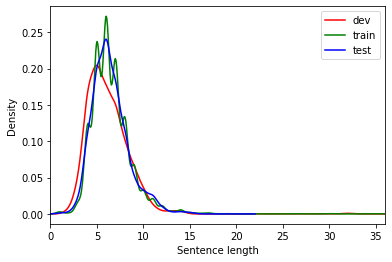

In [130]:
sen_len(dat, "red", True)
sen_len(train, "green", True)
sen_len(test, "blue", True)